In [68]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def Graph(var1, var2, df) :
    
    fig, ax = plt.subplots(figsize=(10, 5))

    # Factor graph
    x = df.index
    y1 = df[var1].values
    y2 = df[var2].values  # GDP

    g1 = ax.plot(x, y1, color='darkred', label=var1.split(',')[0])
    ax.set_ylabel(var1)

    # GDP graph
    ax2 = ax.twinx()
    g2 = ax2.plot(x, y2, c='darkblue', label=var2)
    ax2.set_ylabel(var2)
    
    # Set legend and title
    ax.set_title('{} and {}'.format(var1.split(','), var2))
    plt.legend((g1[0], g2[0]), (var1.split(','), var2), loc='upper right')
    
    # Add correlation text
    corr = round(df[var2].corr(df[var1]), 3)
    plt.text(0.02, 0.9, 'Correlation :\n{}'.format(corr), fontsize=11, transform=ax.transAxes)
    
    plt.show();

In [58]:
df = pd.read_csv('C:/Users/Julien/Documents/consumption/ENSAE Students Groups/Group Conso France/Goods index.csv', sep=';')

# Order index, set it as datetime and take only values post-2000
df.sort_values(by='Date',inplace=True)

df.set_index('Date', inplace=True)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='M')
 
df = df.loc['2000-01-01':]

# Group data by quarter mean
for c in df.columns :
     df[c] = df[c].str.replace(',', '.').astype(float)
        
# Group by quarter
df = df.resample('Q').mean()

# Drop last row to match official data timeframe
df = df.loc[:'2019-12-31']

In [70]:
# Add official data to df
official_df = pd.read_csv('C:/Users/Julien/Documents/consumption/ENSAE Students Groups/Group Conso France/Official_France.csv',)

df['Conso_France'] = official_df.iloc[:, 1].pct_change(4).values

df.head()

,"Industries agricoles et alimentaires, situation actuelle de l'état du carnet de commandes (Brut)","Industries agricoles et alimentaires, évolution des commandes reçues de l`étranger par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, évolution des commandes reçues par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, évolution des effectifs par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, prévisions des effectifs à 1 mois (Brut)","Industries agricoles et alimentaires, évolution des livraisons par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, évolution des prix des matières premières par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, situation actuelle des stocks de matières premières (Brut)","Industries agricoles et alimentaires, évolution du prix des produits finis par rapport au mois précédent (Brut)","Industries agricoles et alimentaires, prévisions du prix des produits finis à 1 mois (Brut)",...,"Industrie manufacturière, évolution du résultat brut d'exploitation par rapport au trimestre précédent (Brut)","Industrie manufacturière, situation de la trésorerie en fin de trimestre (Brut)","Industrie manufacturière, évolution des dépenses d'investissement par rapport au trimestre précédent (CVS)","Industrie manufacturière, prévisions des dépenses d'investissement à 3 mois (CVS)",Indicateur trimestriel du climat des affaires dans l'industrie manufacturière (cvs),"Industrie manufacturière, évolution des marges à l'exportation par rapport au trimestre précédent (CVS)","Industrie manufacturière, évolution des marges par rapport au trimestre précédent (CVS)","Industrie manufacturière, évolution du résultat brut d'exploitation par rapport au trimestre précédent (CVS)","Industrie manufacturière, situation de la trésorerie en fin de trimestre (CVS)",Conso_France
2000-03-31,11.933333,10.300000,20.010000,9.376667,-0.336667,20.956667,6.303333,4.380000,2.823333,6.606667,...,14.710000,11.836667,7.820000,14.866667,107.556667,-0.753333,-1.153333,14.970000,11.870000,NaN
2000-06-30,9.106667,7.063333,7.060000,4.626667,-3.866667,7.743333,3.540000,7.660000,2.046667,1.833333,...,-2.953333,13.710000,-1.133333,9.086667,94.103333,-9.556667,-8.320000,-0.626667,14.193333,NaN
2000-09-30,9.880000,5.166667,2.066667,8.503333,-2.413333,-2.916667,11.823333,1.700000,5.573333,9.906667,...,-2.366667,12.593333,5.000000,16.590000,101.866667,-2.680000,-2.566667,1.786667,12.936667,NaN
2000-12-31,-7.450000,0.810000,5.606667,5.210000,-1.353333,4.820000,6.020000,0.946667,1.043333,2.973333,...,-5.780000,5.446667,0.370000,2.956667,91.653333,-5.790000,-5.583333,-2.746667,6.326667,NaN
2001-03-31,0.756667,5.206667,3.263333,4.156667,0.216667,1.090000,10.510000,-2.036667,5.313333,5.303333,...,-4.696667,7.986667,1.693333,5.733333,94.976667,-2.740000,-3.600000,-1.776667,9.150000,0.027874


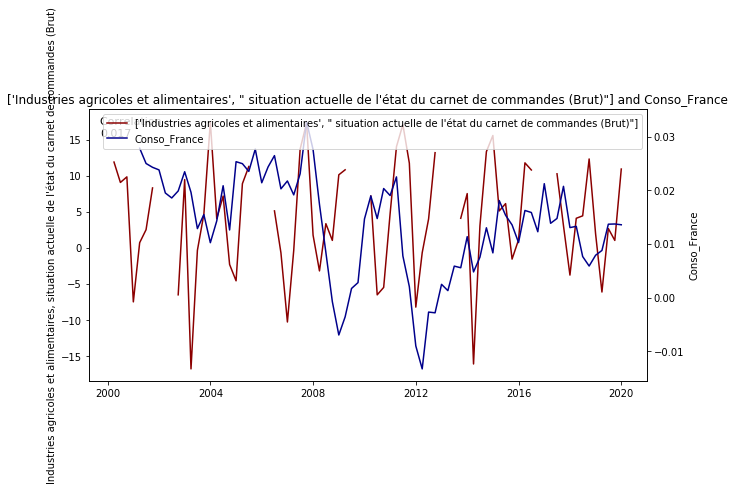

In [71]:
Graph(df.columns[0], 'Conso_France', df)